In [208]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
from sklearn.preprocessing import PolynomialFeatures #для создания полиномиальных признаков

import re
import datetime
from datetime import datetime, timedelta
from itertools import combinations #для теста Стьюдента
from scipy.stats import ttest_ind #для теста Стьюдента
from sklearn.preprocessing import StandardScaler #для std нормализации Стандартизация числовых переменных
from sklearn.preprocessing import MinMaxScaler #для minmax нормализации

import warnings; warnings.simplefilter('ignore')

In [209]:
from pandas import Series
import pandas as pd #есть
import numpy as np #есть


import matplotlib.pyplot as plt #есть
import seaborn as sns #есть

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# DATA

In [210]:
df_market_1 = pd.read_csv('market_1.csv',index_col=0,parse_dates=True) #,header=0,index_col=0,parse_dates=True

In [211]:
df_market_1.head()

,AAPL,ABT,ACN,ADBE,AMZN,BAC,CMCSA,COST,CRM,CSCO,...,TMO,TXN,UNH,UPS,V,VZ,WFC,WMT,XOM,SP500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.5627,19.8710,33.5199,37.09,133.90,13.5348,6.8354,44.2949,18.7050,18.2065,...,45.5262,19.4169,26.4960,41.0831,20.2827,17.9655,20.0333,41.1289,44.2512,1132.9900
2010-01-05,6.5740,19.7105,33.7271,37.70,134.69,13.9747,6.7428,44.1607,18.6250,18.1254,...,45.6796,19.3049,26.4540,41.1537,20.0503,17.9979,20.5833,40.7194,44.4240,1136.5200
2010-01-06,6.4695,19.8200,34.0856,37.62,132.25,14.1386,6.6944,44.7348,18.5925,18.0074,...,46.1109,19.1630,26.7145,40.8501,19.7810,17.4795,20.6126,40.6284,44.8079,1137.1400
2010-01-07,6.4575,19.9841,34.0538,36.89,130.00,14.6044,6.8354,44.5186,18.5100,18.0885,...,46.1109,19.2228,27.7397,40.5394,19.9651,17.3754,21.3606,40.6511,44.6672,1141.6899
2010-01-08,6.5004,20.0863,33.9183,36.69,133.52,14.4750,6.8153,44.1980,18.5375,18.1844,...,46.8872,19.6632,27.4792,42.4883,20.0204,17.3864,21.1626,40.4463,44.4880,1144.9800


In [212]:
df_market_1.index=pd.to_datetime(df_market_1.index,format="%Y%m%d")
df_market_1.index=df_market_1.index.to_period('D')

In [213]:
df_market_1.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2769 entries, 2010-01-04 to 2020-12-31
Freq: D
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2769 non-null   float64
 1   ABT     2769 non-null   float64
 2   ACN     2769 non-null   float64
 3   ADBE    2769 non-null   float64
 4   AMZN    2769 non-null   float64
 5   BAC     2769 non-null   float64
 6   CMCSA   2769 non-null   float64
 7   COST    2769 non-null   float64
 8   CRM     2769 non-null   float64
 9   CSCO    2769 non-null   float64
 10  CVX     2769 non-null   float64
 11  DHR     2769 non-null   float64
 12  DIS     2769 non-null   float64
 13  HD      2769 non-null   float64
 14  INTC    2769 non-null   float64
 15  JNJ     2769 non-null   float64
 16  JPM     2769 non-null   float64
 17  KO      2769 non-null   float64
 18  LLY     2769 non-null   float64
 19  MA      2769 non-null   float64
 20  MCD     2769 non-null   float64
 21  MDT     2769 

In [214]:
df_market_1.head()

,AAPL,ABT,ACN,ADBE,AMZN,BAC,CMCSA,COST,CRM,CSCO,...,TMO,TXN,UNH,UPS,V,VZ,WFC,WMT,XOM,SP500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.5627,19.8710,33.5199,37.09,133.90,13.5348,6.8354,44.2949,18.7050,18.2065,...,45.5262,19.4169,26.4960,41.0831,20.2827,17.9655,20.0333,41.1289,44.2512,1132.9900
2010-01-05,6.5740,19.7105,33.7271,37.70,134.69,13.9747,6.7428,44.1607,18.6250,18.1254,...,45.6796,19.3049,26.4540,41.1537,20.0503,17.9979,20.5833,40.7194,44.4240,1136.5200
2010-01-06,6.4695,19.8200,34.0856,37.62,132.25,14.1386,6.6944,44.7348,18.5925,18.0074,...,46.1109,19.1630,26.7145,40.8501,19.7810,17.4795,20.6126,40.6284,44.8079,1137.1400
2010-01-07,6.4575,19.9841,34.0538,36.89,130.00,14.6044,6.8354,44.5186,18.5100,18.0885,...,46.1109,19.2228,27.7397,40.5394,19.9651,17.3754,21.3606,40.6511,44.6672,1141.6899
2010-01-08,6.5004,20.0863,33.9183,36.69,133.52,14.4750,6.8153,44.1980,18.5375,18.1844,...,46.8872,19.6632,27.4792,42.4883,20.0204,17.3864,21.1626,40.4463,44.4880,1144.9800


In [215]:
df_market_1.isnull().sum()

AAPL     0
ABT      0
ACN      0
ADBE     0
AMZN     0
BAC      0
CMCSA    0
COST     0
CRM      0
CSCO     0
CVX      0
DHR      0
DIS      0
HD       0
INTC     0
JNJ      0
JPM      0
KO       0
LLY      0
MA       0
MCD      0
MDT      0
MRK      0
MS       0
MSFT     0
NFLX     0
NKE      0
NVDA     0
ORCL     0
PEP      0
PFE      0
PG       0
QCOM     0
T        0
TMO      0
TXN      0
UNH      0
UPS      0
V        0
VZ       0
WFC      0
WMT      0
XOM      0
SP500    0
dtype: int64

In [216]:
def get_stat_dif(data,column,target):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], target], 
                        data.loc[data.loc[:, column] == comb[1], target]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
        else:
            return column
            break

In [217]:
for col in df_market_1.columns:
    get_stat_dif(df_market_1,col,'SP500')

Найдены статистически значимые различия для колонки AAPL
Найдены статистически значимые различия для колонки ABT
Найдены статистически значимые различия для колонки ACN
Найдены статистически значимые различия для колонки CMCSA
Найдены статистически значимые различия для колонки COST
Найдены статистически значимые различия для колонки CRM
Найдены статистически значимые различия для колонки CSCO
Найдены статистически значимые различия для колонки DHR
Найдены статистически значимые различия для колонки DIS
Найдены статистически значимые различия для колонки HD
Найдены статистически значимые различия для колонки JNJ
Найдены статистически значимые различия для колонки JPM
Найдены статистически значимые различия для колонки KO
Найдены статистически значимые различия для колонки LLY
Найдены статистически значимые различия для колонки MCD
Найдены статистически значимые различия для колонки MDT
Найдены статистически значимые различия для колонки MRK
Найдены статистически значимые различия для к

<AxesSubplot:>

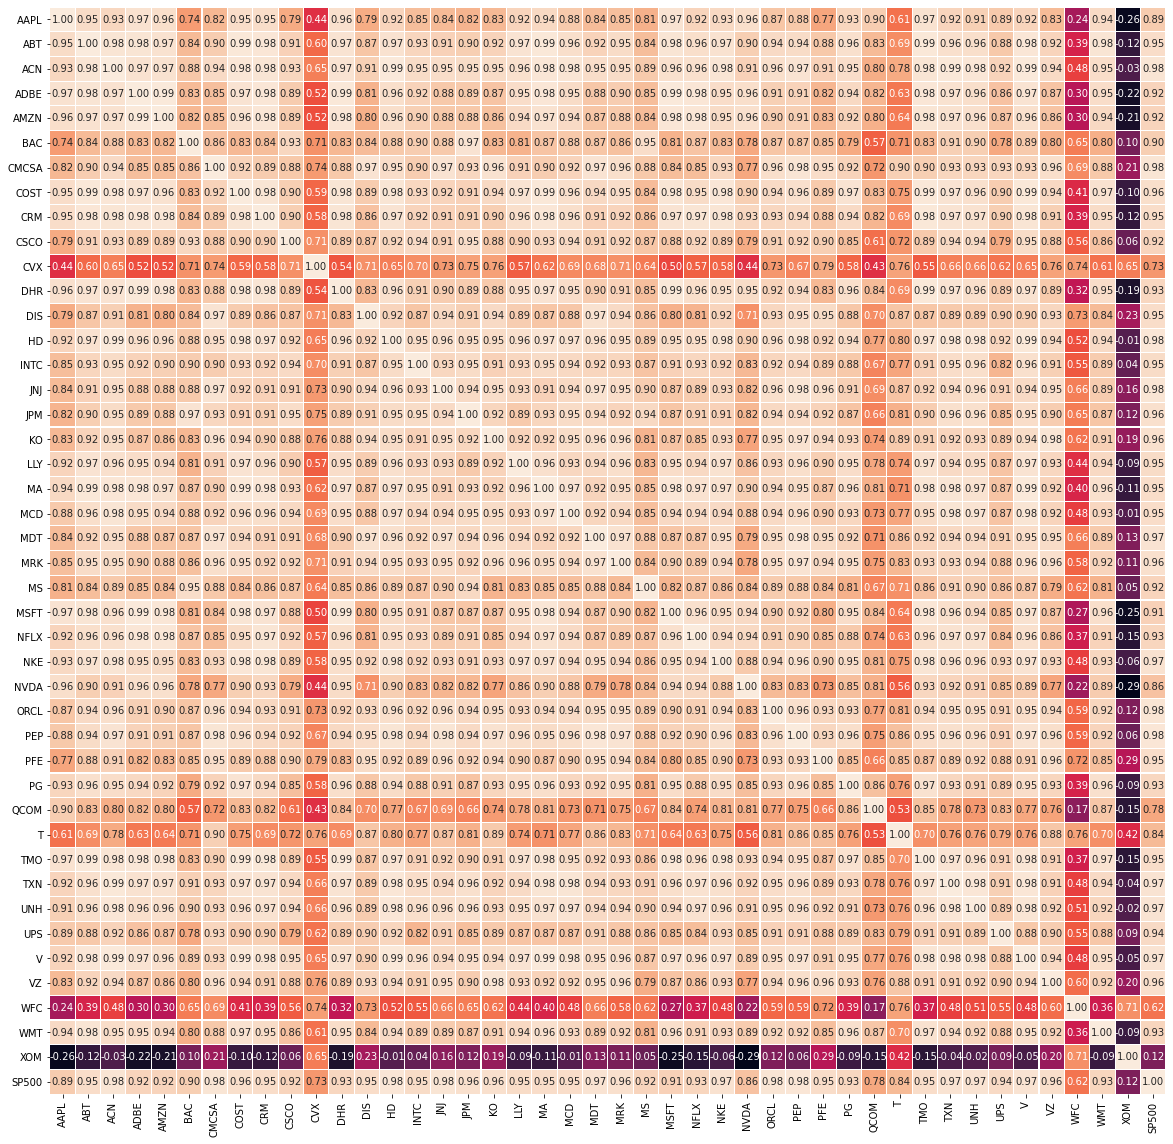

In [218]:
plt.rcParams['figure.figsize'] = (20,20)
sns.heatmap(df_market_1.corr(),annot=True, fmt=".2f", linewidths=0.1, cbar=False)

# Data Preprocessing

In [219]:
X = df_market_1.drop(['SP500','XOM'],axis=1).values
Y = df_market_1.SP500.values

In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=False)

In [221]:
print('Размер исходной выборки: {}\nX_train: {}\nX_test: {}'
      .format(df_market_1.shape, X_train.shape, X_test.shape)
)

Размер исходной выборки: (2769, 44)
X_train: (1938, 42)
X_test: (831, 42)


In [222]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных

LinearRegression()

In [223]:
#Предсказываем на тестовой выборке
y_pred = myModel.predict(X_test)
y_pred

array([2504.80147897, 2496.11165625, 2506.37495554, 2510.21200445,
       2507.11366891, 2504.54137158, 2511.43598505, 2496.78807846,
       2495.98279644, 2501.59486733, 2503.89423336, 2511.2088238 ,
       2518.20260522, 2526.81891388, 2529.54290262, 2547.88785111,
       2545.62966508, 2534.97118754, 2547.57514724, 2551.74893648,
       2537.31069579, 2535.95101055, 2545.66652184, 2544.40703917,
       2547.13520832, 2563.85210546, 2581.96249977, 2583.8041978 ,
       2592.28933101, 2591.60617516, 2605.03830451, 2603.76566293,
       2590.91836436, 2593.66185235, 2595.76677134, 2598.70851683,
       2616.50627012, 2616.06021596, 2611.04741899, 2613.43782833,
       2606.49393243, 2594.20046541, 2605.76805618, 2601.2109579 ,
       2592.76019112, 2616.70942367, 2611.00312879, 2611.89544048,
       2632.67938239, 2631.51023898, 2636.5636672 , 2627.18240552,
       2658.98477117, 2659.38576035, 2675.04045417, 2677.63017138,
       2674.69548997, 2666.07720083, 2664.37469658, 2666.20300

In [224]:
from sklearn import metrics
#Вычисляем MSE:
MSE = metrics.mean_squared_error(Y_test, y_pred)
print(MSE)

34204.33243856905


In [225]:
from sklearn.metrics import mean_squared_error
result = np.sqrt(mean_squared_error(Y_test, y_pred))  
result

184.944133290486

In [226]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))

MAE: 165.21934667665053
